# **Survivors on Titanic prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier, GradientBoostingClassifier
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <font color=black> Variable Description </font>
- PassengerId: <font color=black> passenger's **ID** </font> 
- Survived: <font color=black> **0** </font>= No, <font color=black> **1** </font>= Yes
- PClass: Passenger Class=<font color=black> (1=**1st**. 2=**2nd**,3=**3rd**) </font>
- Name: <font color=black> passenger's **name** </font> 
- Sex: <font color=black> passenger's **sex** </font> 
- Age: <font color=black> passenger's **age** </font> 
- SibSp: <font color=black> **number** of Siblings/Spouses Aboard </font> 
- Parch: <font color=black> **number** of Parents/Children Aboard </font>
- Ticket: <font color=black> **Ticket number** </font> 
- Fare: <font color=black> **Passenger Fare** (British pound) </font> 
- Cabin: <font color=black> **Cabin ID** </font> 
- Embarked: <font color=black> **Port of Embarkation** </font> C=Cherbourg, Q=Queenstown, S=Southampton

# **Data analysis and features engineering**

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


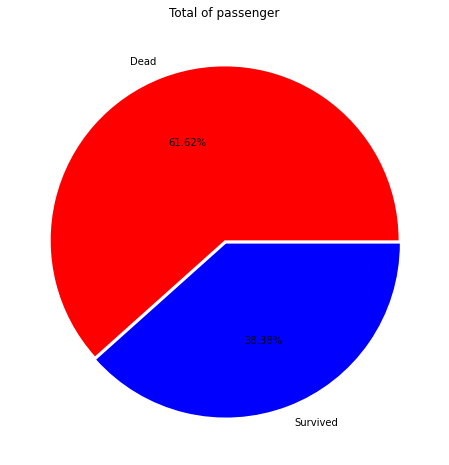

In [7]:
#Survived and dead
plt.figure(figsize=(8,8))
plt.pie(df["Survived"].value_counts(), colors=["red", "blue"], labels=["Dead","Survived"], autopct='%.2f%%', explode=[0,0.02] )
plt.title("Total of passenger");

<AxesSubplot:title={'center':'Fare boxplot'}, xlabel='Fare'>

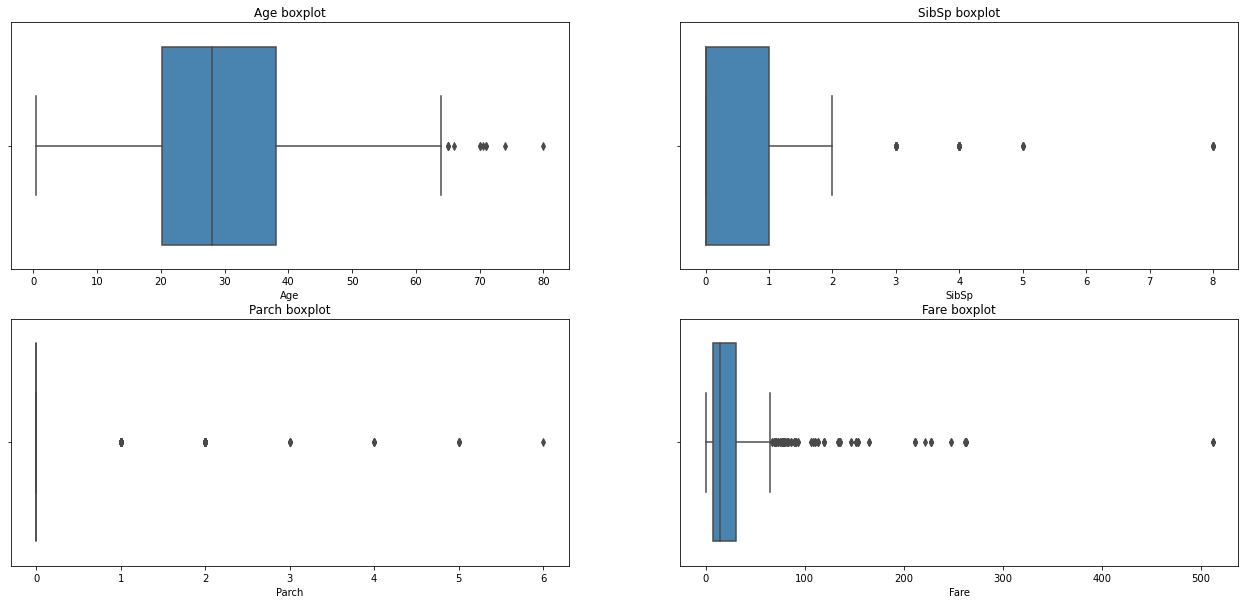

In [8]:
#Outlier detection
plt.figure(figsize=(22,10))

plt.subplot(2,2,1)
plt.title("Age boxplot")
sns.boxplot(x=df.Age, palette="Blues_d")

plt.subplot(2,2,2)
plt.title("SibSp boxplot")
sns.boxplot(x=df.SibSp, palette="Blues_d")

plt.subplot(2,2,3)
plt.title("Parch boxplot")
sns.boxplot(x=df.Parch, palette="Blues_d")

plt.subplot(2,2,4)
plt.title("Fare boxplot")
sns.boxplot(x=df.Fare, palette="Blues_d")



In [9]:
print(np.where(df['Fare']>500))
print(np.where(df["SibSp"]>=8))

(array([258, 679, 737], dtype=int64),)
(array([159, 180, 201, 324, 792, 846, 863], dtype=int64),)


In [10]:
df.drop(df.index[[258, 679, 737,159, 180, 201, 324, 792, 846, 863]], inplace=True)

In [11]:
#Checking null and missing values
df= df.fillna(np.nan)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          679
Embarked         2
dtype: int64

<AxesSubplot:>

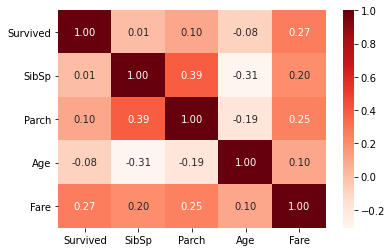

In [12]:
#Correlation matrix between numerical values
sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(), fmt= ".2f", annot=True, cmap="Reds")

Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

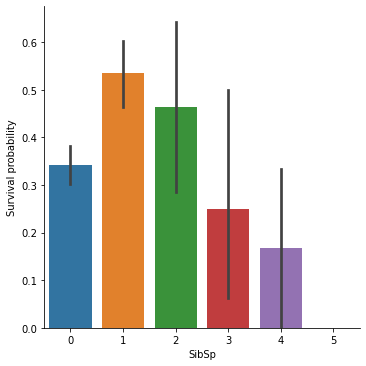

In [13]:
#SibSp
plt.figure(figsize=(16,8))
sns.factorplot(x="SibSp",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

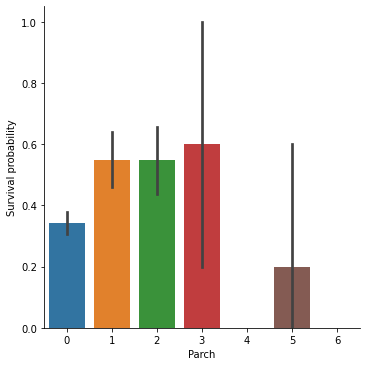

In [14]:
#Parch
plt.figure(figsize=(16,8))
sns.factorplot(x="Parch",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

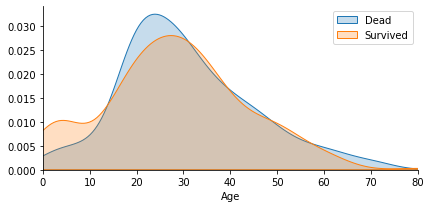

In [15]:
#Age
facet = sns.FacetGrid(df, hue="Survived", aspect=2)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df["Age"].max()))
plt.legend(loc="upper right", labels=["Dead","Survived"]);

In [16]:
df["Age"]=df["Age"].fillna(df["Age"].median())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

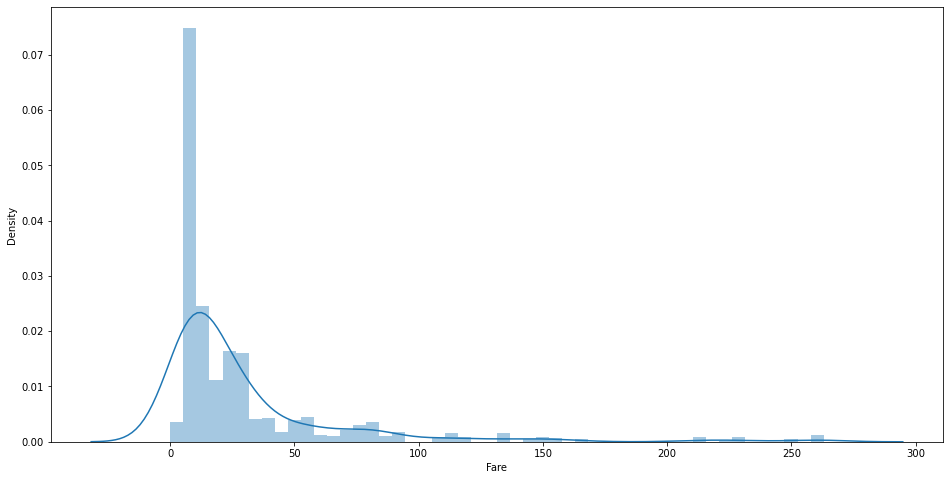

In [17]:
#Fare
df["Fare"]=df["Fare"].fillna(df["Fare"].median())
plt.figure(figsize=(16,8))
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

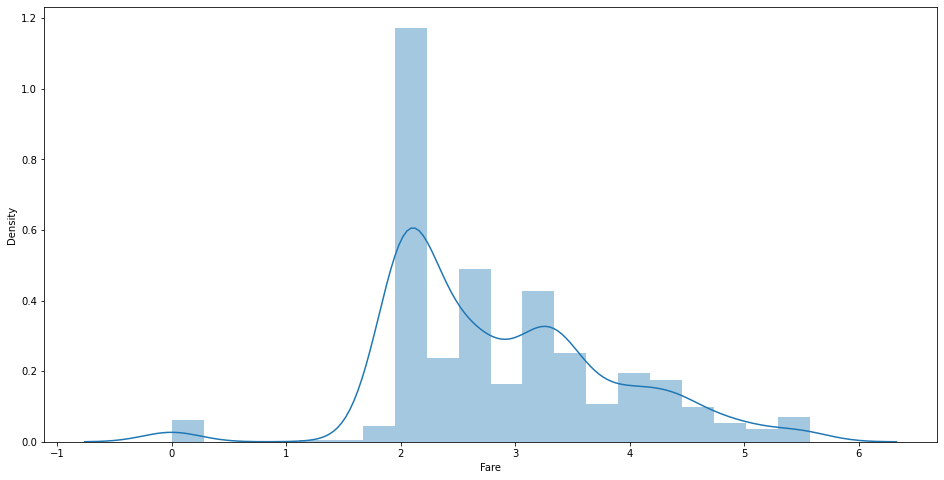

In [18]:
#Apply log to Fare distribution
df["Fare"]= df["Fare"].map(lambda i : np.log(i) if i>0 else 0)
plt.figure(figsize=(16,8))
sns.distplot(df["Fare"])

Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

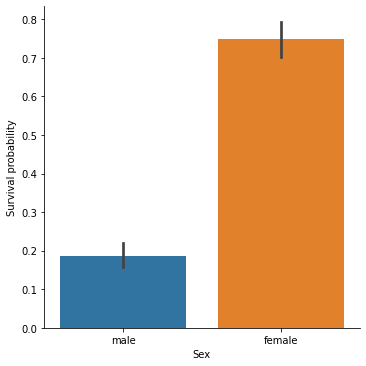

In [19]:
#Sex
plt.figure(figsize=(16,8))
sns.factorplot(x="Sex",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

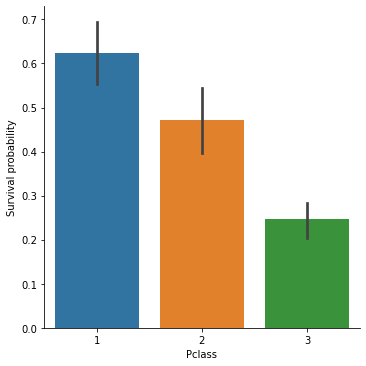

In [20]:
#Pclass
plt.figure(figsize=(16,8))
sns.factorplot(x="Pclass",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

Text(13.419166666666662, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

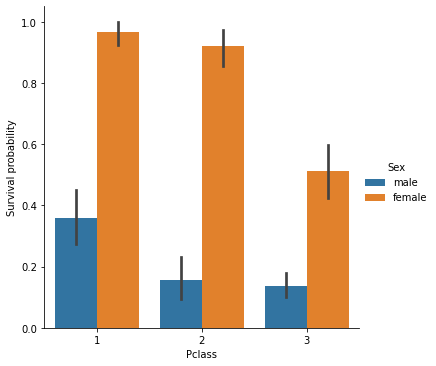

In [21]:
#Pclass and survived by sex
plt.figure(figsize=(16,8))
sns.factorplot(x="Pclass",y="Survived", hue="Sex", data=df, kind="bar")
plt.ylabel("Survival probability")

In [22]:
#standardization of numerical variables
Scaler = StandardScaler()
df[['Age','Fare','SibSp','Parch','Pclass']] = Scaler.fit_transform(df[['Age','Fare','SibSp','Parch','Pclass']])

In [23]:
#Embarked
df["Embarked"].isnull().sum()

2

In [24]:
df["Embarked"].value_counts()

S    637
C    165
Q     77
Name: Embarked, dtype: int64

In [25]:
#Embarked
df["Embarked"]=df["Embarked"].fillna("S")

Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

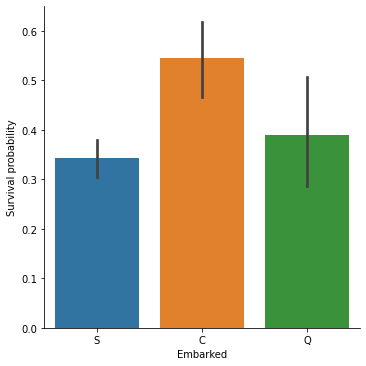

In [26]:
plt.figure(figsize=(16,8))
sns.factorplot(x="Embarked",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

In [27]:
#Dummies variables "Sex","Embarked" and "Pclass"
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)
df = pd.get_dummies(df, columns=['Embarked'])

In [28]:
#Cabin
df["Cabin"].value_counts().sum()

202

In [29]:
df["Cabin"].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [30]:
df["Cabin"].isnull().sum()

679

In [31]:
#Replace cabin number with prefix and fill null values with "X"
df["Cabin"]=pd.Series([i[0] if not pd.isnull(i) else "X" for i in df["Cabin"]])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

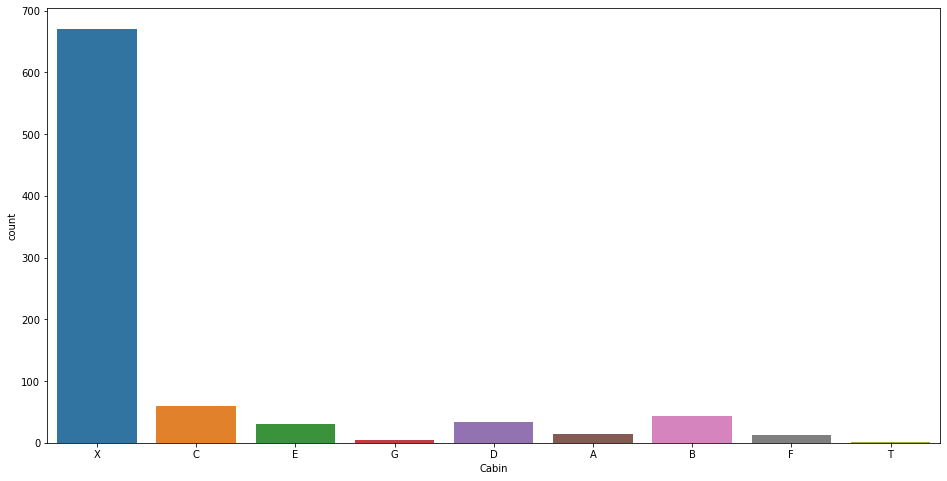

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(df["Cabin"])


Text(6.799999999999997, 0.5, 'Survival probability')

<Figure size 1152x576 with 0 Axes>

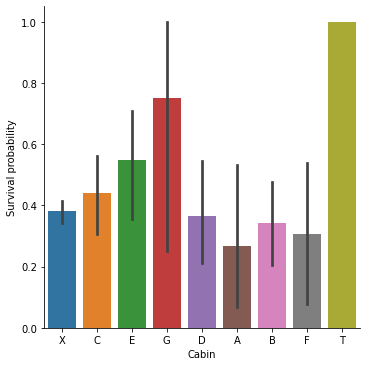

In [33]:
plt.figure(figsize=(16,8))
sns.factorplot(x="Cabin",y="Survived", data=df, kind="bar")
plt.ylabel("Survival probability")

In [34]:
df = pd.get_dummies(df, columns=['Cabin'])

In [35]:
#Take prefix of every ticket, if there is no prefix assign "X"
Ticket =[]
for i in list (df.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        Ticket.append("X")
df.Ticket=Ticket
df.Ticket.head(20)

0         A5
1         PC
2     STONO2
3          X
4          X
5          X
6          X
7          X
8          X
9          X
10        PP
11         X
12        A5
13         X
14         X
15         X
16         X
17         X
18         X
19         X
Name: Ticket, dtype: object

In [36]:
#Dummy for "Ticket"
df = pd.get_dummies(df, columns=['Ticket'])

In [37]:
#Name
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [38]:
# Get Title from Name
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(df_title)
df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

<AxesSubplot:xlabel='Title', ylabel='count'>

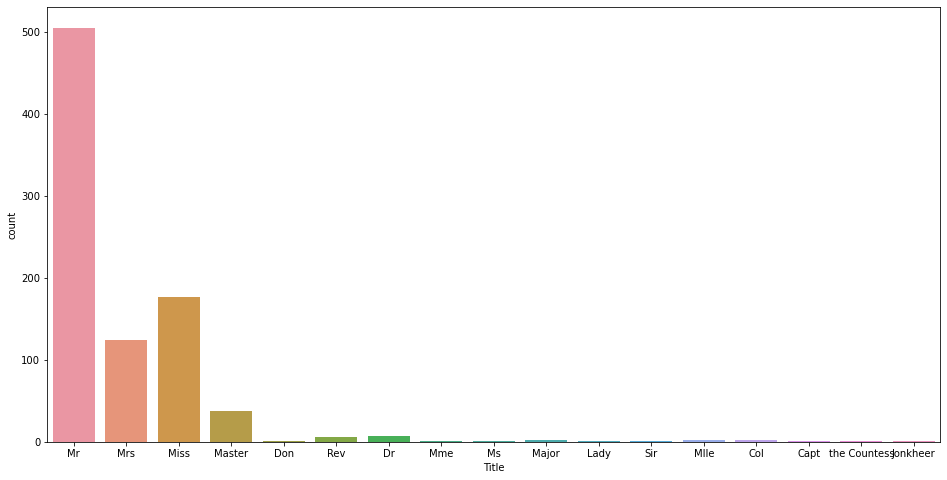

In [39]:
plt.figure(figsize=(16,8))
sns.countplot(x="Title",data=df)

In [40]:
#Group rare title 
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"].value_counts()

Mr        505
Miss      177
Mrs       124
Master     38
Rare       23
Mlle        2
Ms          1
Mme         1
Name: Title, dtype: int64

In [41]:
df["Title"] = df["Title"].replace(['Miss','Ms','Mme', 'Mlle','Mrs'], 'Miss-Mrs')
df["Title"].value_counts()

Mr          505
Miss-Mrs    305
Master       38
Rare         23
Name: Title, dtype: int64

In [42]:
df.drop(labels = ["Name"], axis = 1, inplace = True)

In [43]:
df = pd.get_dummies(df, columns=['Title'])

In [44]:
df.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [45]:
pd.get_option("display.max_columns")
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Title_Master,Title_Miss-Mrs,Title_Mr,Title_Rare
0,0,0.829632,-0.562050,0.605331,-0.463071,-0.907670,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,-1.566780,0.661117,0.605331,-0.463071,1.421429,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0.829632,-0.256259,-0.526934,-0.463071,-0.816958,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1,-1.566780,0.431773,0.605331,-0.463071,1.121347,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0.829632,0.431773,-0.526934,-0.463071,-0.801010,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.368574,-0.179811,-0.526934,-0.463071,-0.312624,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
887,1,-1.566780,-0.791394,-0.526934,-0.463071,0.539516,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
888,0,0.829632,-0.103363,0.605331,2.047486,0.288508,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
889,1,-1.566780,-0.256259,-0.526934,-0.463071,0.539516,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# **Modeling**

In [46]:
X= df.loc[:, df.columns != 'Survived'].values
y= df.loc[:, df.columns == 'Survived'].values.squeeze()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.2, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((704, 53), (177, 53), (704,), (177,))

In [48]:
score_fnc= balanced_accuracy_score
rn=24
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=rn)

In [49]:
#SUPPORT VECTOR MACHINE
param_grid_SVC= {'kernel':['rbf'], 'gamma': np.logspace(0.001,1,100), 'C': loguniform(1e-2,1e3)}
svc = svm.SVC(class_weight="balanced")
rsSVC= RandomizedSearchCV(estimator=svc, param_distributions=param_grid_SVC, scoring=make_scorer(score_fnc),cv=kfold, n_iter=250, n_jobs=-1, verbose=1)
rsSVC.fit(X_train,y_train)
SVC_best = rsSVC.best_estimator_
rsSVC.best_score_, rsSVC.best_params_

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 2493 out of 2500 | elapsed:   42.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   42.2s finished


(0.7443939673590836,
 {'C': 0.7844540044809872, 'gamma': 1.074664065610211, 'kernel': 'rbf'})

In [50]:
#RANDOM FOREST
param_grid_RF= {"max_features":np.arange(1,60), "n_estimators": np.arange(150,250,10),"min_samples_leaf":[1, 3, 7, 10]}
RF = RandomForestClassifier(class_weight="balanced")
rsRF= RandomizedSearchCV(estimator=RF, param_distributions=param_grid_RF , scoring=make_scorer(score_fnc), cv=kfold, n_iter=250, n_jobs=-1, verbose=1)
rsRF.fit(X_train,y_train)
RF_best = rsRF.best_estimator_
rsRF.best_score_, rsRF.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  7.3min finished


(0.8158558173093058,
 {'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 28})

In [51]:
#GBC
gb_param_grid = {'loss':["deviance"],'n_estimators' : [100,200,300],'learning_rate': [0.1, 0.05, 0.01, 0.001],'max_depth': [4,8,16],
            'min_samples_leaf': [100,150,250],'max_features': [0.3, 0.1]}
GBC = GradientBoostingClassifier()
rsGBC = RandomizedSearchCV(estimator=GBC, param_distributions=gb_param_grid , scoring=make_scorer(score_fnc), cv=kfold, n_iter=250, n_jobs=-1, verbose=1)
rsGBC.fit(X_train,y_train)
GBC_best = rsGBC.best_estimator_
rsGBC.best_score_, rsGBC.best_params_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.7min finished


(0.7588330704609774,
 {'n_estimators': 300,
  'min_samples_leaf': 100,
  'max_features': 0.3,
  'max_depth': 16,
  'loss': 'deviance',
  'learning_rate': 0.1})

In [52]:
#ADABOOST
DTC = DecisionTreeClassifier()
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],"base_estimator__splitter" : ["best", "random"],
              "n_estimators" :[1,2],"learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.2]}
adaDTC = AdaBoostClassifier(DTC, random_state=rn)
rsADA = RandomizedSearchCV(adaDTC,param_distributions = ada_param_grid, scoring=make_scorer(score_fnc), cv=kfold, n_iter=250, n_jobs=-1, verbose=1)
rsADA.fit(X_train,y_train)
ADA_best = rsADA.best_estimator_
rsADA.best_score_, rsADA.best_params_

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    2.6s finished


(0.7691447979238677,
 {'n_estimators': 2,
  'learning_rate': 0.1,
  'base_estimator__splitter': 'best',
  'base_estimator__criterion': 'gini'})

In [55]:
#LOGISTIC REGRESSION
param_grid_lr= {"penalty": ["l1","l2"],'C': loguniform(1e-3,1e3)}
LR = LogisticRegression()
rsLR= RandomizedSearchCV(estimator=LR, param_distributions=param_grid_lr , scoring=make_scorer(score_fnc), 
                                    cv=kfold, n_iter=250, verbose=1, n_jobs=-1)
rsLR.fit(X_train,y_train)
LR_best = rsLR.best_estimator_
rsLR.best_score_, rsLR.best_params_

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   14.3s finished


(0.7607706354799377, {'C': 0.1374626241836901, 'penalty': 'l2'})

In [56]:
#I choose a voting classifier to combine the predictions from these models
SVC_best, RF_best, LR_best, GBC_best, ADA_best

(SVC(C=0.7844540044809872, break_ties=False, cache_size=200,
     class_weight='balanced', coef0=0.0, decision_function_shape='ovr', degree=3,
     gamma=1.074664065610211, kernel='rbf', max_iter=-1, probability=False,
     random_state=None, shrinking=True, tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=None, max_features=28,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=200,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 LogisticRegression(C=0.1374626241836901, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
       

In [57]:
#Ensemble modeling
votingC = VotingClassifier(estimators=[('svc', SVC_best), ('rf', RF_best),('lr', LR_best), ('gbc',GBC_best), ('ada',ADA_best)], voting='hard', n_jobs=-1)
votingC = votingC.fit(X_train, y_train)

In [58]:
#Preditcion
prediction=votingC.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
print(round(result,5))

0.87217
